In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
dfvacc = pd.read_csv('../MyVizProject/output_raw_vaccs.csv')
dfvacc.set_index('Date', inplace=True)
dfvacc.rename(columns = {'NumberVaccinated': 'Vaccinations'}, inplace=True)
dfvacc.tail()

,Vaccinations
Date,
2021-06-26,2825032
2021-06-27,2825496
2021-06-28,2826585
2021-06-29,2827779
2021-06-30,2827972


In [6]:
dfcase = pd.read_csv('../MyVizProject/output_raw_cases.csv')
dfcase.set_index('Date', inplace=True)
dfcase.rename(columns = {'DailyPositive': 'Positive Cases'}, inplace=True)
dfcase.tail()

,Positive Cases
Date,
2021-06-26,3322
2021-06-27,3307
2021-06-28,3230
2021-06-29,3116
2021-06-30,2972


In [8]:
dfha = pd.read_csv('../MyVizProject/output_raw_ha.csv')
dfha.set_index('Date', inplace=True)
dfha.rename(columns = {'HospitalAdmissions': 'Hospital Admissions'}, inplace=True)
dfha.tail()

,Hospital Admissions
Date,
2021-06-26,71
2021-06-27,76
2021-06-28,79
2021-06-29,84
2021-06-30,84


In [9]:
dfdeath = pd.read_csv('../MyVizProject/output_raw_deaths.csv')
dfdeath.set_index('Date', inplace=True)
dfdeath.rename(columns = {'DailyDeaths': 'Deaths'}, inplace=True)
dfdeath.tail()

,Deaths
Date,
2021-06-26,6
2021-06-27,6
2021-06-28,6
2021-06-29,4
2021-06-30,4


In [10]:
dfs = [dfvacc, dfcase, dfha, dfdeath]

In [11]:
df_all = pd.concat(dfs, axis=1, join="inner")
df_all

,Vaccinations,Positive Cases,Hospital Admissions,Deaths
Date,,,,
2021-01-05,3551,1934,191,60
2021-01-06,7881,1814,190,62
2021-01-07,12684,1732,180,62
2021-01-08,17791,1691,178,63
2021-01-09,23353,1646,178,60
...,...,...,...,...
2021-06-26,2825032,3322,71,6
2021-06-27,2825496,3307,76,6
2021-06-28,2826585,3230,79,6


In [ ]:
# Scotland population = 5466000

In [ ]:
/ 6466000 * 100,000

In [181]:
df_all.columns

Index(['Vaccinations', 'PositiveCases', 'HospitalAdmissions', 'Deaths'], dtype='object')

In [12]:
cols = ['Vaccinations', 'Positive Cases', 'Hospital Admissions', 'Deaths']

In [13]:
df_all_pop = df_all.apply(lambda x:  (x[cols]/ 6466000) * 100000, axis=1)
df_all_pop.rename(columns = {'Vaccinations': 'Vaccinated_per_pop', 'Positive Cases': 'PositiveCases_per_pop',
                            'Hospital Admissions':'HospitalAdmissions_per_pop','Deaths':'Deaths_per_pop'}, inplace=True)
df_all_pop

,Vaccinated_per_pop,PositiveCases_per_pop,HospitalAdmissions_per_pop,Deaths_per_pop
Date,,,,
2021-01-05,54.918033,29.910300,2.953913,0.927931
2021-01-06,121.883699,28.054439,2.938447,0.958862
2021-01-07,196.164553,26.786267,2.783792,0.958862
2021-01-08,275.146922,26.152181,2.752861,0.974327
2021-01-09,361.166100,25.456233,2.752861,0.927931
...,...,...,...,...
2021-06-26,43690.566038,51.376431,1.098051,0.092793
2021-06-27,43697.742035,51.144448,1.175379,0.092793
2021-06-28,43714.583978,49.953603,1.221775,0.092793


In [14]:
df = pd.concat([df_all, df_all_pop], axis=1, join="inner")
df

,Vaccinations,Positive Cases,Hospital Admissions,Deaths,Vaccinated_per_pop,PositiveCases_per_pop,HospitalAdmissions_per_pop,Deaths_per_pop
Date,,,,,,,,
2021-01-05,3551,1934,191,60,54.918033,29.910300,2.953913,0.927931
2021-01-06,7881,1814,190,62,121.883699,28.054439,2.938447,0.958862
2021-01-07,12684,1732,180,62,196.164553,26.786267,2.783792,0.958862
2021-01-08,17791,1691,178,63,275.146922,26.152181,2.752861,0.974327
2021-01-09,23353,1646,178,60,361.166100,25.456233,2.752861,0.927931
...,...,...,...,...,...,...,...,...
2021-06-26,2825032,3322,71,6,43690.566038,51.376431,1.098051,0.092793
2021-06-27,2825496,3307,76,6,43697.742035,51.144448,1.175379,0.092793
2021-06-28,2826585,3230,79,6,43714.583978,49.953603,1.221775,0.092793


## Matrix

In [15]:
dfcorr = df.corr(method='kendall')
dfcorr

,Vaccinations,Positive Cases,Hospital Admissions,Deaths,Vaccinated_per_pop,PositiveCases_per_pop,HospitalAdmissions_per_pop,Deaths_per_pop
Vaccinations,1.000000,-0.205453,-0.432140,-0.605518,1.000000,-0.205453,-0.432140,-0.605518
Positive Cases,-0.205453,1.000000,0.753504,0.603714,-0.205453,1.000000,0.753504,0.603714
Hospital Admissions,-0.432140,0.753504,1.000000,0.840125,-0.432140,0.753504,1.000000,0.840125
Deaths,-0.605518,0.603714,0.840125,1.000000,-0.605518,0.603714,0.840125,1.000000
Vaccinated_per_pop,1.000000,-0.205453,-0.432140,-0.605518,1.000000,-0.205453,-0.432140,-0.605518
PositiveCases_per_pop,-0.205453,1.000000,0.753504,0.603714,-0.205453,1.000000,0.753504,0.603714
HospitalAdmissions_per_pop,-0.432140,0.753504,1.000000,0.840125,-0.432140,0.753504,1.000000,0.840125
Deaths_per_pop,-0.605518,0.603714,0.840125,1.000000,-0.605518,0.603714,0.840125,1.000000


In [16]:
dfcorr_all = df_all.corr(method='kendall')
dfcorr_all

,Vaccinations,Positive Cases,Hospital Admissions,Deaths
Vaccinations,1.000000,-0.205453,-0.432140,-0.605518
Positive Cases,-0.205453,1.000000,0.753504,0.603714
Hospital Admissions,-0.432140,0.753504,1.000000,0.840125
Deaths,-0.605518,0.603714,0.840125,1.000000


<AxesSubplot:>

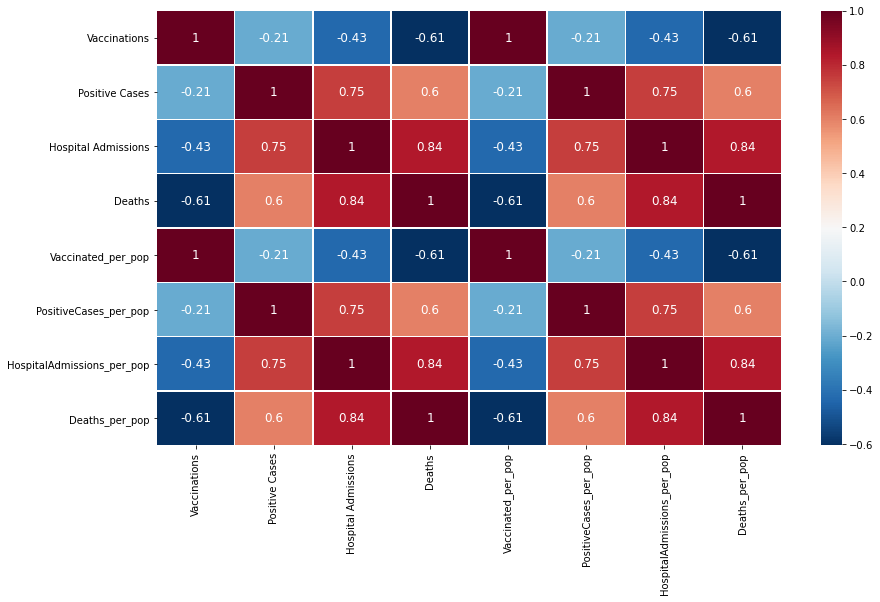

In [17]:
fig, ax = plt.subplots(figsize=(14,8)) 
sb.heatmap(dfcorr, 
           xticklabels=dfcorr.columns, 
           yticklabels=dfcorr.columns, 
           cmap='RdBu_r', 
           annot=True,
           annot_kws={"fontsize":12},
           linewidth=0.5,
           ax=ax)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Vaccinations'),
  Text(1.5, 0, 'Positive Cases'),
  Text(2.5, 0, 'Hospital Admissions'),
  Text(3.5, 0, 'Deaths')])

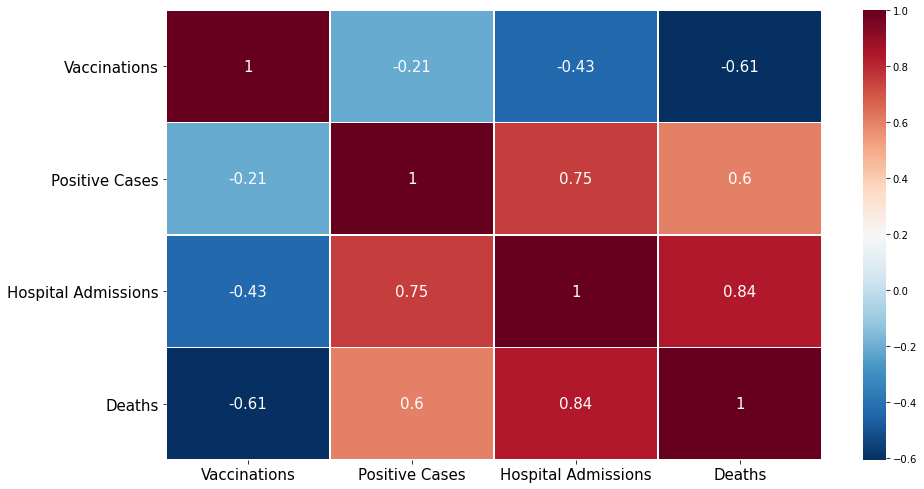

In [18]:
fig, ax = plt.subplots(figsize=(14.7,8.27)) 
sb.heatmap(dfcorr_all, 
           xticklabels=dfcorr_all.columns, 
           yticklabels=dfcorr_all.columns, 
           cmap='RdBu_r', 
           annot=True,
           annot_kws={"fontsize":15},
           linewidth=0.5,
           ax=ax)

plt.yticks(fontsize=15, rotation='horizontal')
plt.xticks(fontsize=15, rotation='horizontal')

In [19]:
dfcorr_all_p = df_all.corr(method='pearson')
dfcorr_all_p

,Vaccinations,Positive Cases,Hospital Admissions,Deaths
Vaccinations,1.000000,0.031298,-0.708367,-0.807245
Positive Cases,0.031298,1.000000,0.520647,0.296873
Hospital Admissions,-0.708367,0.520647,1.000000,0.960745
Deaths,-0.807245,0.296873,0.960745,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Vaccinations'),
  Text(1.5, 0, 'Positive Cases'),
  Text(2.5, 0, 'Hospital Admissions'),
  Text(3.5, 0, 'Deaths')])

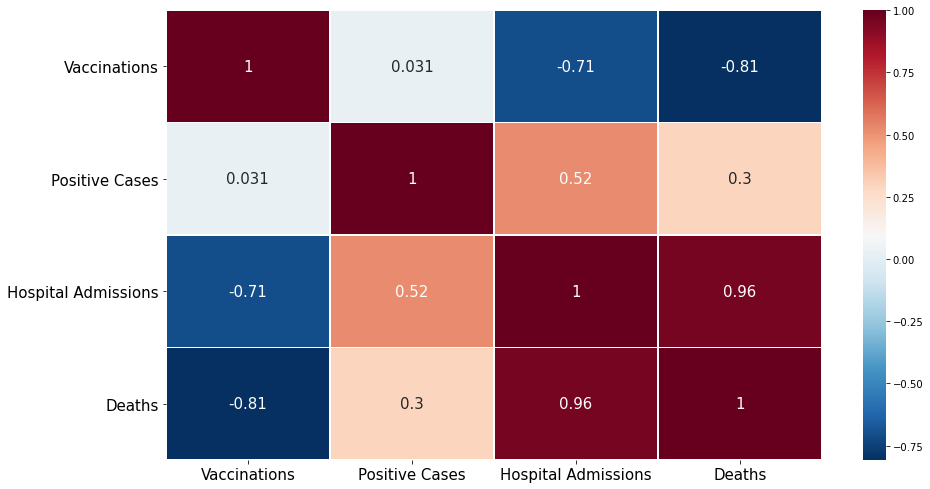

In [20]:
fig, ax = plt.subplots(figsize=(14.7,8.27)) 
sb.heatmap(dfcorr_all_p, 
           xticklabels=dfcorr_all_p.columns, 
           yticklabels=dfcorr_all_p.columns, 
           cmap='RdBu_r', 
           annot=True,
           annot_kws={"fontsize":15},
           linewidth=0.5,
           ax=ax)

plt.yticks(fontsize=15, rotation='horizontal')
plt.xticks(fontsize=15, rotation='horizontal')

In [21]:
dfcorr_all
#dfcorr_all.columns

,Vaccinations,Positive Cases,Hospital Admissions,Deaths
Vaccinations,1.000000,-0.205453,-0.432140,-0.605518
Positive Cases,-0.205453,1.000000,0.753504,0.603714
Hospital Admissions,-0.432140,0.753504,1.000000,0.840125
Deaths,-0.605518,0.603714,0.840125,1.000000


In [22]:
df = dfcorr_all.rename_axis(None).rename_axis(None, axis=1)
df

,Vaccinations,Positive Cases,Hospital Admissions,Deaths
Vaccinations,1.000000,-0.205453,-0.432140,-0.605518
Positive Cases,-0.205453,1.000000,0.753504,0.603714
Hospital Admissions,-0.432140,0.753504,1.000000,0.840125
Deaths,-0.605518,0.603714,0.840125,1.000000


In [23]:
df1 = dfcorr_all.stack().reset_index()
df1

,level_0,level_1,0
0,Vaccinations,Vaccinations,1.000000
1,Vaccinations,Positive Cases,-0.205453
2,Vaccinations,Hospital Admissions,-0.432140
3,Vaccinations,Deaths,-0.605518
4,Positive Cases,Vaccinations,-0.205453
5,Positive Cases,Positive Cases,1.000000
6,Positive Cases,Hospital Admissions,0.753504
7,Positive Cases,Deaths,0.603714
8,Hospital Admissions,Vaccinations,-0.432140
9,Hospital Admissions,Positive Cases,0.753504


In [26]:
df1.rename(columns={'level_0':'Metric', 'level_1':'Metric 2', 0: 'Corr coef'}, inplace=True)
df1

,Metric,Metric 2,Corr coef
0,Vaccinations,Vaccinations,1.000000
1,Vaccinations,Positive Cases,-0.205453
2,Vaccinations,Hospital Admissions,-0.432140
3,Vaccinations,Deaths,-0.605518
4,Positive Cases,Vaccinations,-0.205453
5,Positive Cases,Positive Cases,1.000000
6,Positive Cases,Hospital Admissions,0.753504
7,Positive Cases,Deaths,0.603714
8,Hospital Admissions,Vaccinations,-0.432140
9,Hospital Admissions,Positive Cases,0.753504


In [27]:
df1.to_csv('output_corr_kendall.csv', index=False)